In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# This loads the data from the .csv files provided
# adjusts x1 and x2 to range between 0,1
# this is done by taking the max as 1 and the min as 0
data = pd.read_csv('data.csv', header=None)
x1 = (data[0] - data[0].min()) / (data[0].max() - data[0].min())
x2 = (data[1] - data[1].min()) / (data[1].max() - data[1].min())
y = data[2].values
X = np.column_stack((x1, x2)) 

In [3]:
# setting up the weights, bias, learning_rate, and iterartions
# the learning_rate and iterations can be changed to get new results
# the more iterations the more trainging the model goes through
weights = np.random.rand(2)
bias = np.random.rand()
learning_rate = 0.01
iterations = 1000

In [4]:
# this helps witht he model to evaluate whether the value should be 0 or 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
# resource: https://medium.com/@rakeshandugala/how-artificial-neural-networks-work-from-perceptrons-to-gradient-descent-28c5552d5426
# measures the error  between the actual and predicted
def crossEntropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))

In [11]:
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output)

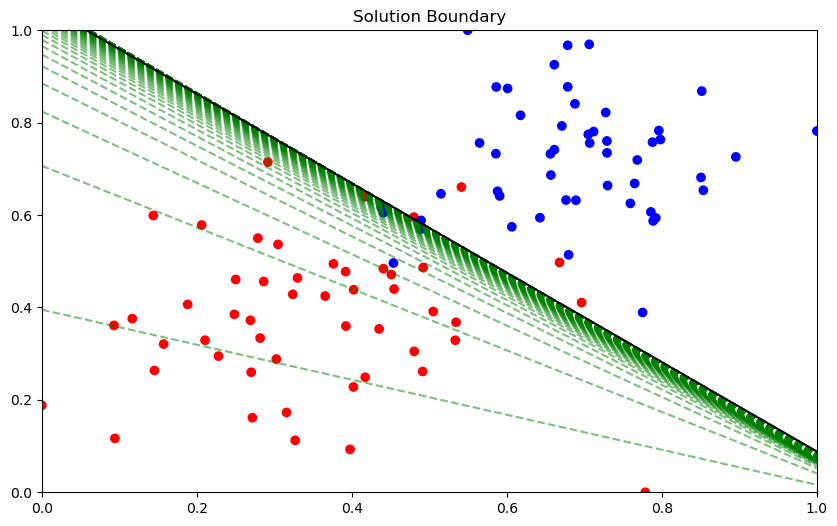

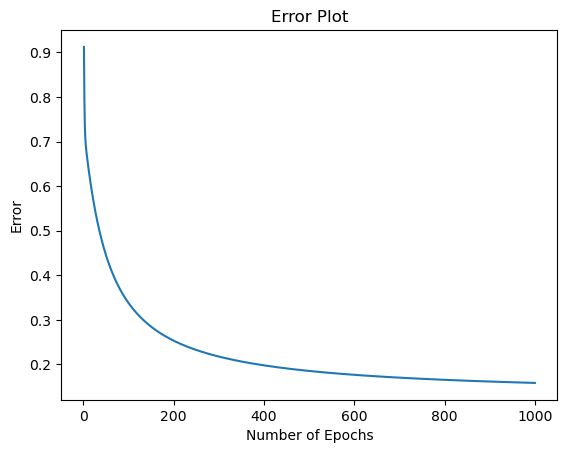

In [12]:
# calu;ates the predicton error
# updates the weights anf bias propotionate to the learning_rate
def updatedW(X, y, weights, bias, learning_rate):
    y_pred = predict(X, weights, bias)
    error = y - y_pred
    weights += learning_rate * np.dot(error, X)
    bias += learning_rate * np.sum(error)
    return weights, bias, crossEntropy(y, y_pred)

plt.figure(figsize=(10,6))
plt.scatter(x1, x2, c=y, cmap='bwr')

# plots the boundary using random weights and boundaries
# The boundary was kept between 0 and 1 to avoid large outliers
# slope gets calculated based on the weights ratio
# intercept is based on the bias
x_values = np.array([0, 1])
if weights[1] != 0:
    initial_slope = -weights[0] / weights[1]
    initial_intercept = -bias / weights[1]
else:
    initial_slope = 0
    initial_intercept = 0
initial_y_values = initial_slope * x_values + initial_intercept
plt.plot(x_values, initial_y_values, 'r-')

# here is where the "training" is done
# plots the green dahses seen in the grpah
# what this does is updates the weights and bias
losses = []
for epoch in range(iterations):
    weights, bias, loss = updatedW(X, y, weights, bias, learning_rate)
    losses.append(loss)
    if epoch % 10 == 0:
        if weights[1] != 0:
            slope = -weights[0] / weights[1]
            intercept = -bias / weights[1]
        else:
            slope = 0
            intercept = 0
        y_values = slope * x_values + intercept
        plt.plot(x_values, y_values, 'g--', alpha=0.5)

# this gives out the final boundary after everything is ran
if weights[1] != 0:
    final_slope = -weights[0] / weights[1]
    final_intercept = -bias / weights[1]
else:
    final_slope = 0
    final_intercept = 0
final_y_values = final_slope * x_values + final_intercept
plt.plot(x_values, final_y_values, 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Solution Boundary")
plt.show()

plt.figure()
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.plot(range(1, iterations + 1), losses)
plt.title("Error Plot")
plt.show()